In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [38]:
hf = pd.read_csv('data/creditcard.csv')

In [39]:
# the display() function works better for displaying dataframes in Jupyter Notebooks than print().
display(hf.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
np.random.seed(516)

# create train and test
train, test = train_test_split(hf, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

# view some stats by different variables
train_stats = train.groupby('Class')[['Time', 'Amount', 'V1']].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('Class')[['Time', 'Amount', 'V1']].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 213605
Rows in test: 71202
Training data:
                Time              Amount                V1        
               mean   count        mean   count      mean   count
Class                                                            
0      94825.432509  213230   88.803152  213230  0.009783  213230
1      80862.469333     375  119.359653     375 -5.023753     375
Testing data:
                Time             Amount               V1       
               mean  count        mean  count      mean  count
Class                                                         
0      94876.507013  71085   86.754814  71085  0.003681  71085
1      80376.094017    117  131.351282    117 -3.964882    117


In [41]:
pred_vars = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4'] 

In [42]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(train[pred_vars], train['Class'])

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
rf = ensemble.RandomForestClassifier()
rf.fit(train[pred_vars], train['Class'])

RandomForestClassifier()

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20))
mlp.fit(train[pred_vars], train['Class'])

MLPClassifier(hidden_layer_sizes=(20, 20))

In [45]:
svc = svm.SVC(probability=True)
svc.fit(train[pred_vars], train['Class'])

SVC(probability=True)

In [46]:
nb = GaussianNB()
nb.fit(train[pred_vars], train['Class'])

GaussianNB()

In [47]:
lr = LogisticRegression()
lr.fit(train[pred_vars], train['Class'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# list of our models
fitted = [dtree, rf, mlp, svc, nb, lr]

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'clf_report'])

for clf in fitted:
    # print the name of the classifier
    print(clf.__class__.__name__)
    
    # get predictions
    yproba = clf.predict_proba(test[pred_vars])
    yclass = clf.predict(test[pred_vars])
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test['Class'],  yproba[:,1])
    auc = metrics.roc_auc_score(test['Class'], yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test['Class'], yproba[:,1])
    
    # add some other stats based on confusion matrix
    clf_report = metrics.classification_report(test['Class'], yclass)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'clf_report': clf_report}, ignore_index=True)

DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
SVC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
LogisticRegression


In [49]:
result_table.set_index('classifier_name', inplace=True)
display(result_table)

,fpr,tpr,auc,log_loss,clf_report
classifier_name,,,,,
DecisionTreeClassifier,"[0.0, 0.00042202996412745304, 0.00042202996412...","[0.0, 0.452991452991453, 0.5128205128205128, 0...",0.797009,0.036545,precision recall f1-score ...
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03418803418803419, 0.06837606837606838...",0.910923,0.011815,precision recall f1-score ...
MLPClassifier,"[0.0, 1.40676654709151e-05, 0.0003094886403601...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.525395,0.056987,precision recall f1-score ...
SVC,"[0.0, 1.40676654709151e-05, 7.033832735457551e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.531168,0.012170,precision recall f1-score ...
GaussianNB,"[0.0, 0.0009847365829640572, 0.000998804248434...","[0.0, 0.1111111111111111, 0.11965811965811966,...",0.944658,0.080707,precision recall f1-score ...
LogisticRegression,"[0.0, 0.0, 0.0, 2.81353309418302e-05, 2.813533...","[0.0, 0.008547008547008548, 0.0512820512820512...",0.790107,0.014100,precision recall f1-score ...


In [50]:
for i in result_table.index:
    print('\n---- statistics for', i, "----\n")
    print(result_table.loc[i, 'clf_report'])
    print("Model log loss:", result_table.loc[i, 'log_loss'])


---- statistics for DecisionTreeClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.67      0.56      0.61       117

    accuracy                           1.00     71202
   macro avg       0.83      0.78      0.80     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.036544787739219056

---- statistics for RandomForestClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.94      0.52      0.67       117

    accuracy                           1.00     71202
   macro avg       0.97      0.76      0.83     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.011814981923793518

---- statistics for MLPClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.0

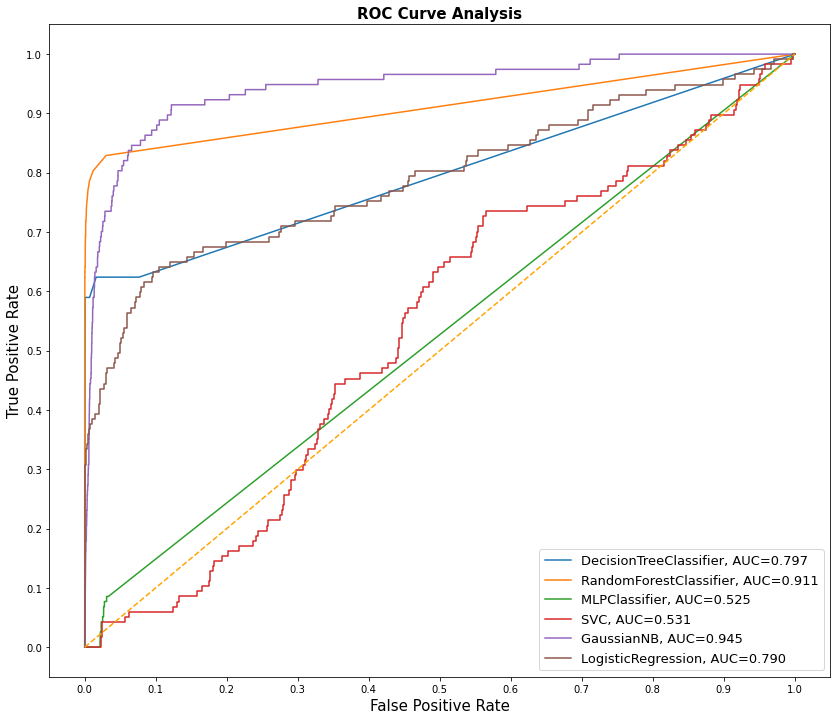

In [51]:
fig = plt.figure(figsize=(14,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Tasks

1. Run the model with at least 10 predictors. Does it improve the overall performance? 
2. Adjust some parameters of the random forest model. Note how similar to decision trees thes parameters are.
3. Overall, Which model would you choose? Why?

## Task 1

In [52]:
np.random.seed(516)

# create train and test
train, test = train_test_split(hf, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

# view some stats by different variables
train_stats = train.groupby('Class')[['Time', 'Amount', 'V1']].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('Class')[['Time', 'Amount', 'V1']].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 213605
Rows in test: 71202
Training data:
                Time              Amount                V1        
               mean   count        mean   count      mean   count
Class                                                            
0      94825.432509  213230   88.803152  213230  0.009783  213230
1      80862.469333     375  119.359653     375 -5.023753     375
Testing data:
                Time             Amount               V1       
               mean  count        mean  count      mean  count
Class                                                         
0      94876.507013  71085   86.754814  71085  0.003681  71085
1      80376.094017    117  131.351282    117 -3.964882    117


In [53]:
hf.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [54]:
pred_vars = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
 'V27', 'V28'] 

In [55]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(train[pred_vars], train['Class'])

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [56]:
rf = ensemble.RandomForestClassifier()
rf.fit(train[pred_vars], train['Class'])

RandomForestClassifier()

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20))
mlp.fit(train[pred_vars], train['Class'])

MLPClassifier(hidden_layer_sizes=(20, 20))

In [58]:
svc = svm.SVC(probability=True)
svc.fit(train[pred_vars], train['Class'])

SVC(probability=True)

In [59]:
nb = GaussianNB()
nb.fit(train[pred_vars], train['Class'])

GaussianNB()

In [60]:
lr = LogisticRegression()
lr.fit(train[pred_vars], train['Class'])

LogisticRegression()

In [61]:
# list of our models
fitted = [dtree, rf, mlp, svc, nb, lr]

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'clf_report'])

for clf in fitted:
    # print the name of the classifier
    print(clf.__class__.__name__)
    
    # get predictions
    yproba = clf.predict_proba(test[pred_vars])
    yclass = clf.predict(test[pred_vars])
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test['Class'],  yproba[:,1])
    auc = metrics.roc_auc_score(test['Class'], yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test['Class'], yproba[:,1])
    
    # add some other stats based on confusion matrix
    clf_report = metrics.classification_report(test['Class'], yclass)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'clf_report': clf_report}, ignore_index=True)

DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
SVC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
LogisticRegression


In [62]:
result_table.set_index('classifier_name', inplace=True)
display(result_table)

,fpr,tpr,auc,log_loss,clf_report
classifier_name,,,,,
DecisionTreeClassifier,"[0.0, 0.0001688119856509812, 0.000196947316592...","[0.0, 0.7948717948717948, 0.7948717948717948, ...",0.903596,0.016787,precision recall f1-score ...
RandomForestClassifier,"[0.0, 0.0, 0.0, 1.40676654709151e-05, 1.406766...","[0.0, 0.03418803418803419, 0.10256410256410256...",0.934406,0.008248,precision recall f1-score ...
MLPClassifier,"[0.0, 0.0, 0.0, 1.40676654709151e-05, 1.406766...","[0.0, 0.008547008547008548, 0.0341880341880341...",0.565004,0.011579,precision recall f1-score ...
SVC,"[0.0, 0.0, 0.0, 4.22029964127453e-05, 4.220299...","[0.0, 0.008547008547008548, 0.0170940170940170...",0.606147,0.012089,precision recall f1-score ...
GaussianNB,"[0.0, 0.0020960821551663502, 0.002180488147991...","[0.0, 0.37606837606837606, 0.37606837606837606...",0.953232,0.126826,precision recall f1-score ...
LogisticRegression,"[0.0, 4.22029964127453e-05, 4.22029964127453e-...","[0.0, 0.09401709401709402, 0.1111111111111111,...",0.908147,0.013122,precision recall f1-score ...


In [63]:
for i in result_table.index:
    print('\n---- statistics for', i, "----\n")
    print(result_table.loc[i, 'clf_report'])
    print("Model log loss:", result_table.loc[i, 'log_loss'])


---- statistics for DecisionTreeClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.87      0.79      0.83       117

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.016787318767452264

---- statistics for RandomForestClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.94      0.77      0.85       117

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.008247683422524176

---- statistics for MLPClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.5

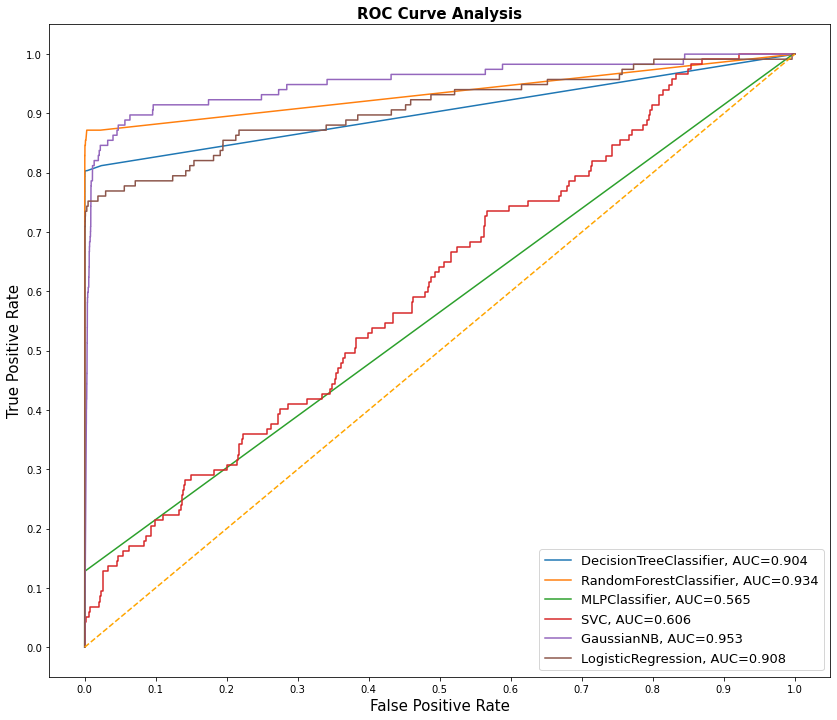

In [64]:
fig = plt.figure(figsize=(14,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Task 2

In [65]:
np.random.seed(516)

# create train and test
train, test = train_test_split(hf, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

# view some stats by different variables
train_stats = train.groupby('Class')[['Time', 'Amount', 'V1']].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('Class')[['Time', 'Amount', 'V1']].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 213605
Rows in test: 71202
Training data:
                Time              Amount                V1        
               mean   count        mean   count      mean   count
Class                                                            
0      94825.432509  213230   88.803152  213230  0.009783  213230
1      80862.469333     375  119.359653     375 -5.023753     375
Testing data:
                Time             Amount               V1       
               mean  count        mean  count      mean  count
Class                                                         
0      94876.507013  71085   86.754814  71085  0.003681  71085
1      80376.094017    117  131.351282    117 -3.964882    117


In [66]:
pred_vars = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
 'V27', 'V28'] 
rf = ensemble.RandomForestClassifier(max_depth=15, max_features='sqrt', bootstrap=False)
rf.fit(train[pred_vars], train['Class'])

RandomForestClassifier(bootstrap=False, max_depth=15, max_features='sqrt')

In [67]:
# list of our models
fitted = [dtree, rf, mlp, svc, nb, lr]

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'clf_report'])

for clf in fitted:
    # print the name of the classifier
    print(clf.__class__.__name__)
    
    # get predictions
    yproba = clf.predict_proba(test[pred_vars])
    yclass = clf.predict(test[pred_vars])
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test['Class'],  yproba[:,1])
    auc = metrics.roc_auc_score(test['Class'], yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test['Class'], yproba[:,1])
    
    # add some other stats based on confusion matrix
    clf_report = metrics.classification_report(test['Class'], yclass)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'clf_report': clf_report}, ignore_index=True)

DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
SVC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
LogisticRegression


In [68]:
result_table.set_index('classifier_name', inplace=True)
display(result_table)

,fpr,tpr,auc,log_loss,clf_report
classifier_name,,,,,
DecisionTreeClassifier,"[0.0, 0.0001688119856509812, 0.000196947316592...","[0.0, 0.7948717948717948, 0.7948717948717948, ...",0.903596,0.016787,precision recall f1-score ...
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.40676654709151e-05...","[0.0, 0.19658119658119658, 0.24786324786324787...",0.970629,0.002703,precision recall f1-score ...
MLPClassifier,"[0.0, 0.0, 0.0, 1.40676654709151e-05, 1.406766...","[0.0, 0.008547008547008548, 0.0341880341880341...",0.565004,0.011579,precision recall f1-score ...
SVC,"[0.0, 0.0, 0.0, 4.22029964127453e-05, 4.220299...","[0.0, 0.008547008547008548, 0.0170940170940170...",0.606147,0.012089,precision recall f1-score ...
GaussianNB,"[0.0, 0.0020960821551663502, 0.002180488147991...","[0.0, 0.37606837606837606, 0.37606837606837606...",0.953232,0.126826,precision recall f1-score ...
LogisticRegression,"[0.0, 4.22029964127453e-05, 4.22029964127453e-...","[0.0, 0.09401709401709402, 0.1111111111111111,...",0.908147,0.013122,precision recall f1-score ...


In [69]:
for i in result_table.index:
    print('\n---- statistics for', i, "----\n")
    print(result_table.loc[i, 'clf_report'])
    print("Model log loss:", result_table.loc[i, 'log_loss'])


---- statistics for DecisionTreeClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.87      0.79      0.83       117

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.016787318767452264

---- statistics for RandomForestClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.94      0.78      0.85       117

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.0027028205093698548

---- statistics for MLPClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.

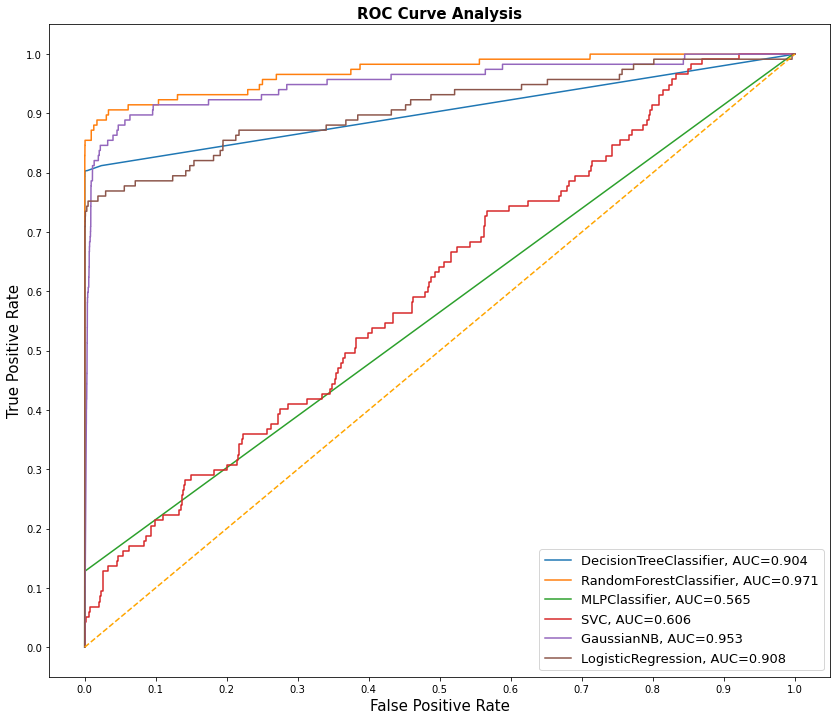

In [70]:
fig = plt.figure(figsize=(14,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Task 3

I would choose my Random Forest Classifier from my task 2 models

Thi is because the Random Forest Classifier is the most accurate overall. However, it is also useful because it was the best model for predicting not credit card fraud and credit card fraud.

# Optional

Construct a voting classifier (class or prob). Voting classifiers take the predictions from several models and "vote" on the most likely class. They can also use the average probability over all models. There is a built-in function in sklearn to make this fairly simple.


In [94]:
voting_model_1 = ensemble.VotingClassifier(estimators=[
('rf', rf), ('dtree', dtree), ('lr', lr)],
voting='soft', weights=[1.5,1,1])
voting_model_1.fit(train[pred_vars], train['Class'])

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=15,
                                                     max_features='sqrt')),
                             ('dtree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10)),
                             ('lr', LogisticRegression())],
                 voting='soft', weights=[1.5, 1, 1])

In [95]:
# list of our models
fitted = [dtree, rf, mlp, svc, nb, lr, voting_model_1]

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'clf_report'])

for clf in fitted:
    # print the name of the classifier
    print(clf.__class__.__name__)
    
    # get predictions
    yproba = clf.predict_proba(test[pred_vars])
    yclass = clf.predict(test[pred_vars])
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test['Class'],  yproba[:,1])
    auc = metrics.roc_auc_score(test['Class'], yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test['Class'], yproba[:,1])
    
    # add some other stats based on confusion matrix
    clf_report = metrics.classification_report(test['Class'], yclass)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'clf_report': clf_report}, ignore_index=True)

DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
SVC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
LogisticRegression
VotingClassifier


In [96]:
result_table.set_index('classifier_name', inplace=True)
display(result_table)

,fpr,tpr,auc,log_loss,clf_report
classifier_name,,,,,
DecisionTreeClassifier,"[0.0, 0.0001688119856509812, 0.000196947316592...","[0.0, 0.7948717948717948, 0.7948717948717948, ...",0.903596,0.016787,precision recall f1-score ...
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.40676654709151e-05...","[0.0, 0.19658119658119658, 0.24786324786324787...",0.970629,0.002703,precision recall f1-score ...
MLPClassifier,"[0.0, 0.0, 0.0, 1.40676654709151e-05, 1.406766...","[0.0, 0.008547008547008548, 0.0341880341880341...",0.565004,0.011579,precision recall f1-score ...
SVC,"[0.0, 0.0, 0.0, 4.22029964127453e-05, 4.220299...","[0.0, 0.008547008547008548, 0.0170940170940170...",0.606147,0.012089,precision recall f1-score ...
GaussianNB,"[0.0, 0.0020960821551663502, 0.002180488147991...","[0.0, 0.37606837606837606, 0.37606837606837606...",0.953232,0.126826,precision recall f1-score ...
LogisticRegression,"[0.0, 4.22029964127453e-05, 4.22029964127453e-...","[0.0, 0.09401709401709402, 0.1111111111111111,...",0.908147,0.013122,precision recall f1-score ...
VotingClassifier,"[0.0, 0.0, 0.0, 1.40676654709151e-05, 1.406766...","[0.0, 0.05128205128205128, 0.1452991452991453,...",0.957863,0.003736,precision recall f1-score ...


In [97]:
for i in result_table.index:
    print('\n---- statistics for', i, "----\n")
    print(result_table.loc[i, 'clf_report'])
    print("Model log loss:", result_table.loc[i, 'log_loss'])


---- statistics for DecisionTreeClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.87      0.79      0.83       117

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.016787318767452264

---- statistics for RandomForestClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.94      0.78      0.85       117

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Model log loss: 0.0027028205093698548

---- statistics for MLPClassifier ----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.

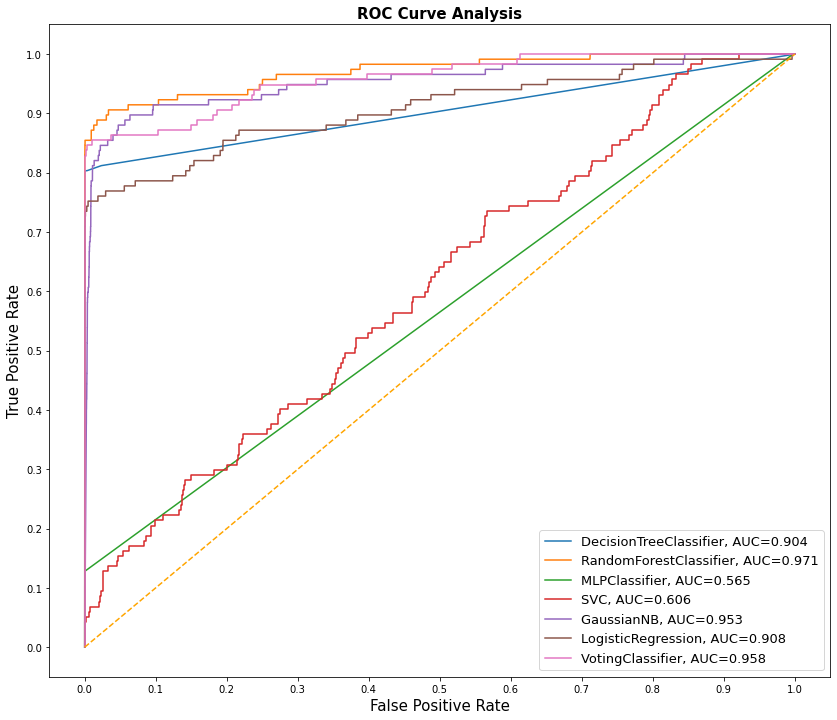

In [98]:
fig = plt.figure(figsize=(14,12))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()